In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [160]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [161]:
sns.set()

<h3>[Problem 1] Understanding the content of the competition</h3>

<h4>What kind of company is Home Credit?</h4>
An international consumer finance provider, responsible lending primarily to people with little or no credit history.

<h4>What is expected in this competition?</h4>
Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

<h4>What are the benefits companies can gain by predicting this?</h4>
Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

<h3>[Problem 2] Understanding the overview of data</h3>

<h4>
    Use .head() , .info() , describe() , etc.​ ​</h4>

In [162]:
application_data_root = pd.read_csv('./application_train.csv')
col_descr = pd.read_csv('./HomeCredit_columns_description.csv')

Column description

In [163]:
print(col_descr.shape)
col_descr[col_descr['Table'] == 'application_{train|test}.csv']

(219, 5)


,ID,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [164]:
print("TARGET: {}".format(col_descr.loc[1, 'Description']))

TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


Data overview

In [165]:
print(application_data_root.shape)
application_data_root.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [166]:
application_data_root.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

Data type info

Basic statistics description

In [167]:
application_data_root.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

The dataset gives information about 307511 clients that participate in borrowing money

<h4>check and process missing values</h4>

Missing data info

In [168]:
missing_value_count = application_data_root.isnull().sum()
missing_value_percentage = (missing_value_count / application_data_root.shape[0]) * 100

missing_value_data = pd.DataFrame({
                            'missing_count': missing_value_count,
                            'missing_percentage': missing_value_percentage
                        })

missing_value_data

,missing_count,missing_percentage
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.003902


In [169]:
application_data1 = application_data_root.copy()

process missing data: delete all columns that has at least 1 missing data to avoid statistics error

In [170]:
for feature in missing_value_data.index:
    if (missing_value_data.loc[feature, 'missing_count'] > 0):
        application_data1.drop(columns=feature, inplace=True)

print(application_data1.shape)
application_data1.head()

(307511, 55)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
application_data1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DO

<h4>Draw a graph showing the percentage of classes</h4>

I picks the target variable and 6 objective variables to explore <br>
- target variable: TARGET
- Feature variables: NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, CNT_CHILDREN.

In [172]:
def pie_chart(feature, chart_title, data=application_data1):
    data[feature].value_counts().plot.pie(
            title = chart_title, 
            autopct=lambda p: "{:.2f}%".format(p)
            )

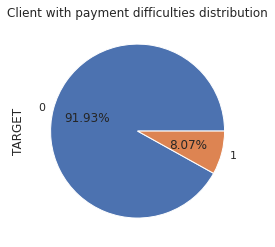

In [173]:
pie_chart('TARGET', 'Client with payment difficulties distribution')

The percentage of clients that have payment difficulties is really high, which accounts for 91.93%

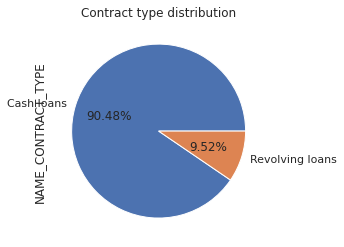

In [174]:
pie_chart('NAME_CONTRACT_TYPE', 'Contract type distribution')

Most of clients issue cash loans model (90.48%)

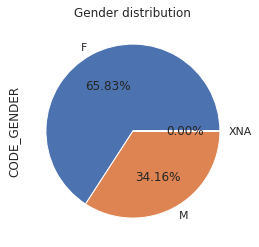

In [175]:
pie_chart('CODE_GENDER', 'Gender distribution')

Most of the clients are women (65.83%)

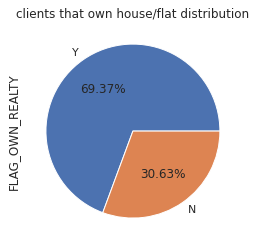

In [176]:
pie_chart('FLAG_OWN_REALTY', 'clients that own house/flat distribution')

Most of the clients own house/flat (69.37%)

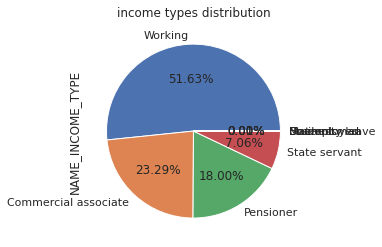

In [177]:
pie_chart('NAME_INCOME_TYPE', 'income types distribution')

Most of clients earn income by working (51.63%), which accounts for a half of income types count, following is from commercial associate (23.29%), pensioner then state servant. Others are minimal.

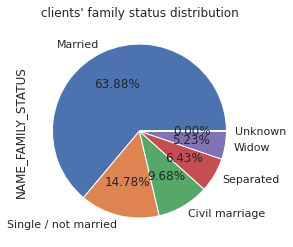

In [178]:
pie_chart('NAME_FAMILY_STATUS', "clients' family status distribution")

Most of clients are married (63.88%)

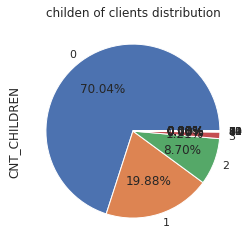

In [179]:
pie_chart('CNT_CHILDREN', 'childen of clients distribution')

Most of clients have no children (70.04%)

<h3>[Problem 3] Defining issues</h3>

- What kind of relationship between payment difficulties and 6 objective variables above?
- Examine the distribution of credit amount of loans.
- Find 5 combinations with the most highest correlation and graph those pairs.
- Find the correlation between client income and credit amount of loans, then classify the scatter plot with payment difficulties classes and with 6 features above.

<h3>[Problem 4] Data exploration</h3>

- <h4>What kind of relationship between payment difficulties and 6 objective variables above?<h4>

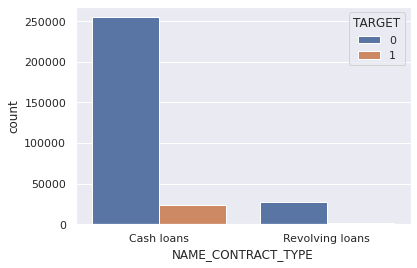

In [180]:
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=application_data1.loc[:, ['TARGET', 'NAME_CONTRACT_TYPE']])

It can be seen that cases of payment difficulties to higher than other cases for both the 2 loans methods. However, clients that using cash loans method and have payment difficulties are much higher than clients that using reovolving loans method.

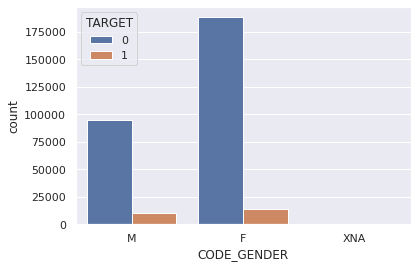

In [181]:
sns.countplot(x='CODE_GENDER', hue='TARGET', data=application_data1.loc[:, ['TARGET', 'CODE_GENDER']])

It can be seen that the number of female that have payment difficulties (190000) is nearly doubled the number of male that have payment difficulties(95000). Moreover, The distribution of payment difficulties is much more higher than other cases in both genders. Cases of payment difficulties is higher than other cases for all classes.

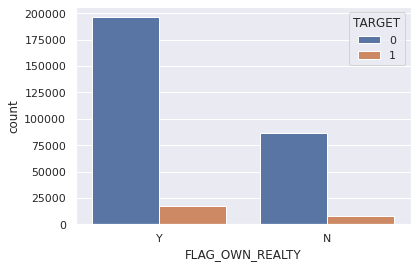

In [182]:
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=application_data1.loc[:, ['TARGET', 'FLAG_OWN_REALTY']])

It can be seen that the number of clients that own house/flat and have payment difficulties is nearly doubled those who do not have. Cases of payment difficulties is higher than other cases for all classes.

[Text(0, 0, 'Working'),
 Text(0, 0, 'State servant'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Maternity leave')]

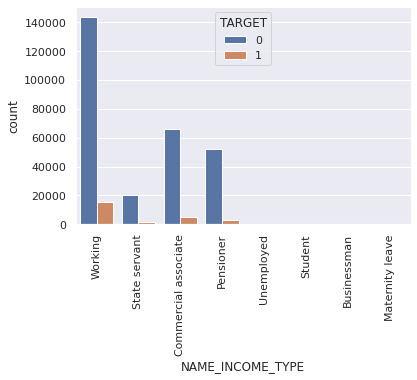

In [183]:
g = sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=application_data1.loc[:, ['TARGET', 'NAME_INCOME_TYPE']])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Not only most clients earn income by working participate in borrowing money, but also most of them have payment difficulties (x8). Cases of payment difficulties is higher than other cases for all classes.

[Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Unknown')]

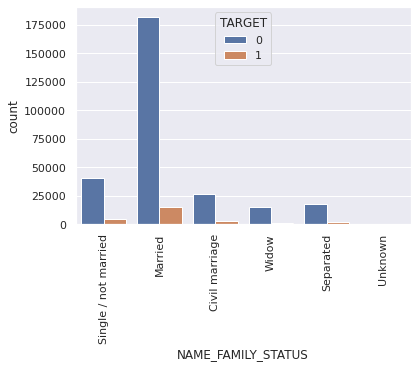

In [184]:
g = sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=application_data1.loc[:, ['TARGET', 'NAME_FAMILY_STATUS']])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Most of clients are married and have payment difficulties. Cases of payment difficulties is higher than other cases for all classes.

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '14'),
 Text(0, 0, '19')]

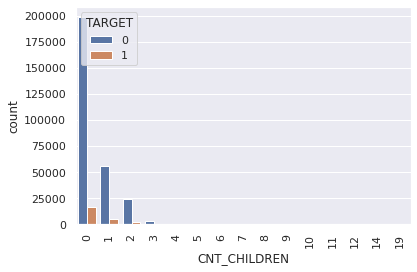

In [185]:
g = sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=application_data1.loc[:, ['TARGET', 'CNT_CHILDREN']])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Most of clients have no children and have payment difficulties. Cases of payment difficulties is higher than other cases for all classes.

<font size="4"> CONCLUSION: By examine 6 features above, the number of clients that have payment difficulties is higher than those who do not have, for all classes</font>

- <h4>Examine the distribution of credit amount of loans.</h4>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


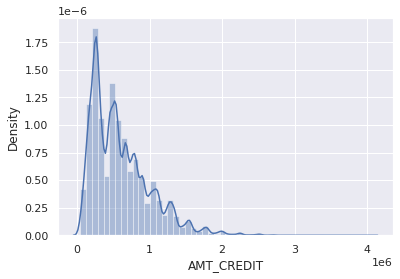

In [186]:
sns.distplot(a=application_data1['AMT_CREDIT'])

In [187]:
print("skewness: {}".format(application_data1['AMT_CREDIT'].skew()))
print("kurtosis: {}".format(application_data1['AMT_CREDIT'].kurtosis()))

skewness: 1.2347784971349398
kurtosis: 1.9340413008324937


- <h4>Find 5 combinations with the most highest correlation and graph those pairs.</h4>

In [188]:
corr_data = application_data1.corr()
corr_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,-0.025573,0.330938,-0.239818,0.183395,-0.028019,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,0.001786,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293,0.003945,-0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,-0.002450
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.074796,0.027261,-0.064223,0.027805,0.008506,0.000325,0.063994,-0.017193,-0.008290,0.000159,0.038378,-0.085465,-0.091735,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,-0.001000,-0.016751,0.000529,0.001507,-0.045878,0.003825,0.072451,0.018389,0.000290,0.002315,0.002540,0.022747,0.020708,0.010793,0.007269,0.002230,0.003130,0.002408,0.000242,-0.000589
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.099738,-0.055436,-0.066838,0.009621,-0.006575,0.001436,0.065519,-0.021085,0.023653,0.026213,0.016632,-0.101776,-0.110915,0.052738,0.024010,0.051929,0.052609,-0.026886,-0.018856,0.000081,0.008905,0.096365,0.000630,-0.011756,-0.046717,-0.004040,0.082819,0.022602,-0.003100,0.028986,0.003857,0.052429,0.048828,0.032252,0.061925,0.011743,0.034329,0.021082,0.031023,-0.016148


Heatmap of correlation


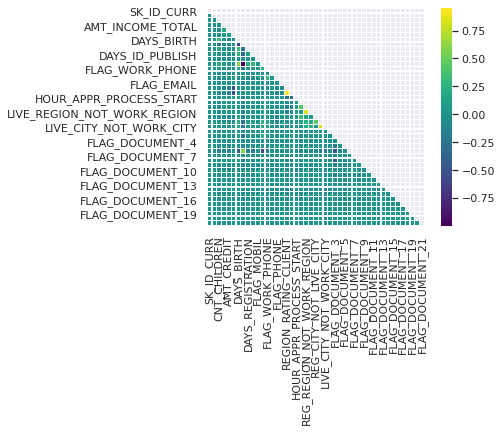

In [189]:
heatmap_mask = np.triu(np.ones_like(corr_data, dtype= bool))
print("Heatmap of correlation")
sns.heatmap(corr_data, cmap="viridis", mask=heatmap_mask, square=True, linewidths=.2)

In [190]:
high_corr_ndarray = np.tril(corr_data, k=-1)
count = 0
combinations = 5
highest_corr_idx = {'row': [], 'col': []}

while (count < combinations):
    max_idx_col = np.argmax(np.max(high_corr_ndarray, axis=0), axis=0)
    max_idx_row = np.argmax(np.max(high_corr_ndarray, axis=1), axis=0)
    highest_corr_idx['row'].append(max_idx_row)
    highest_corr_idx['col'].append(max_idx_col)
    high_corr_ndarray[max_idx_row, max_idx_col] = 0

    count = count + 1

print(highest_corr_idx)

print("{} highest correlation pairs:\n".format(combinations))
for i in range(0, combinations):
    print("{} - {}: {}".format(
                    corr_data.index[highest_corr_idx['row'][i]],
                    corr_data.columns.values[highest_corr_idx['col'][i]],
                    corr_data.iloc[highest_corr_idx['row'][i], highest_corr_idx['col'][i]]
    ))

{'row': [17, 21, 24, 11, 29], 'col': [16, 20, 23, 6, 7]}
5 highest correlation pairs:

REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT: 0.9508422141600533
LIVE_REGION_NOT_WORK_REGION - REG_REGION_NOT_WORK_REGION: 0.8606267802758127
LIVE_CITY_NOT_WORK_CITY - REG_CITY_NOT_WORK_CITY: 0.8255747229651973
FLAG_EMP_PHONE - DAYS_BIRTH: 0.6198876962018092
FLAG_DOCUMENT_6 - DAYS_EMPLOYED: 0.5974844373734427


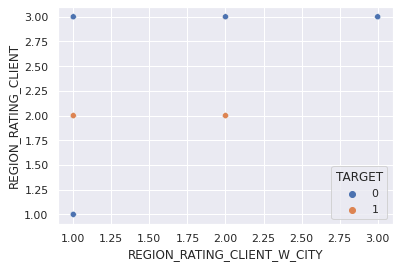

In [191]:
sns.scatterplot(data=application_data1,
                x=application_data1['REGION_RATING_CLIENT_W_CITY'],
                y=application_data1['REGION_RATING_CLIENT'],
                hue='TARGET'
                )

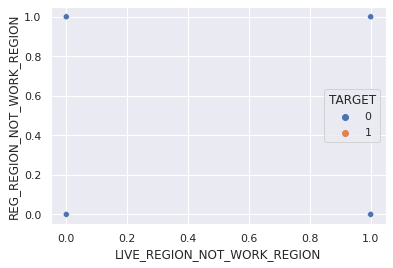

In [192]:
sns.scatterplot(data=application_data1,
                x=application_data1['LIVE_REGION_NOT_WORK_REGION'],
                y=application_data1['REG_REGION_NOT_WORK_REGION'],
                hue='TARGET'
                )

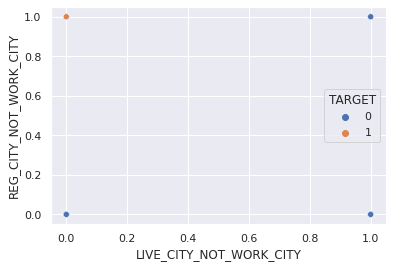

In [193]:
sns.scatterplot(data=application_data1,
                x=application_data1['LIVE_CITY_NOT_WORK_CITY'],
                y=application_data1['REG_CITY_NOT_WORK_CITY'],
                hue='TARGET'
                )

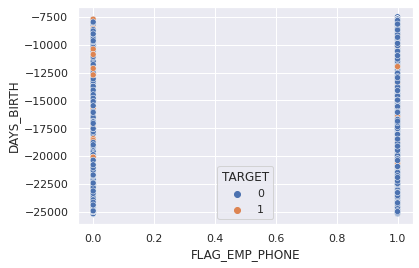

In [194]:
sns.scatterplot(data=application_data1,
                x=application_data1['FLAG_EMP_PHONE'],
                y=application_data1['DAYS_BIRTH'],
                hue='TARGET'
                )

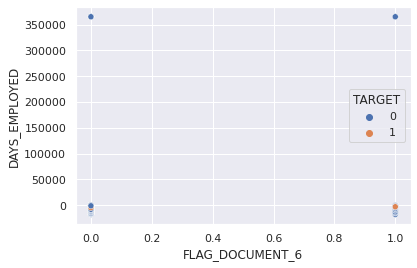

In [195]:
sns.scatterplot(data=application_data1,
                x=application_data1['FLAG_DOCUMENT_6'],
                y=application_data1['DAYS_EMPLOYED'],
                hue='TARGET'
                )

<font size="4"> CONCLUSION: Although the the high correlation of these pairs, it is hard to see by graphing</font>

- <h4>Find the correlation between client income with credit amount of loans, then classify the scatter plot with payment difficulties classes and with 6 features above.</h4>


There is an intuitive thought about why people borrow money is due to their lack of money to handle things, specifically there are some problem with there income. Let's check the relationship between client income with credit amount of loans and see what happen.

In [196]:
print("Correlation of AMT_CREDIT - AMT_INCOME_TOTAL: {}".format(corr_data.loc['AMT_CREDIT', 'AMT_INCOME_TOTAL']))

Correlation of AMT_CREDIT - AMT_INCOME_TOTAL: 0.15687027185191418


The correlation is quite low, which means there is hardly a Pearson correlation between the pair.

Let's graph the relationship between them and classify with the features
NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, CNT_CHILDREN.

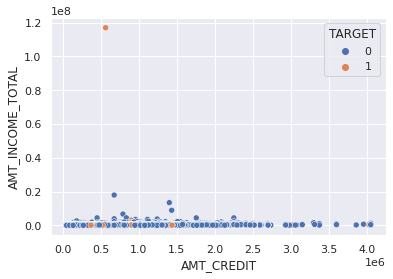

In [197]:
sns.scatterplot(data=application_data1,
                x=application_data1['AMT_CREDIT'],
                y=application_data1['AMT_INCOME_TOTAL'],
                hue='TARGET'
                )

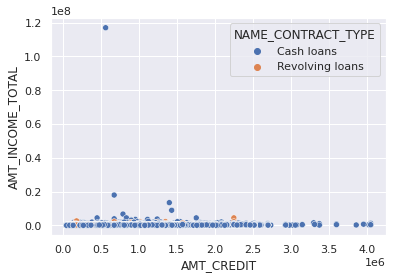

In [198]:
sns.scatterplot(data=application_data1,
                x=application_data1['AMT_CREDIT'],
                y=application_data1['AMT_INCOME_TOTAL'],
                hue='NAME_CONTRACT_TYPE'
                )

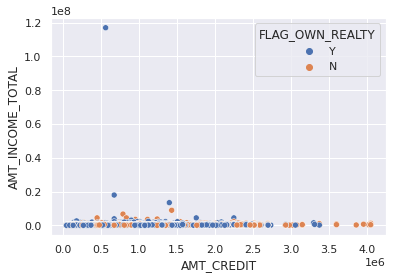

In [199]:
sns.scatterplot(data=application_data1,
                x=application_data1['AMT_CREDIT'],
                y=application_data1['AMT_INCOME_TOTAL'],
                hue='FLAG_OWN_REALTY'
                )

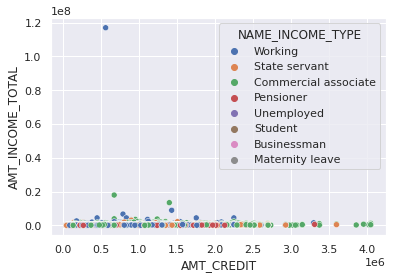

In [200]:
sns.scatterplot(data=application_data1,
                x=application_data1['AMT_CREDIT'],
                y=application_data1['AMT_INCOME_TOTAL'],
                hue='NAME_INCOME_TYPE'
                )

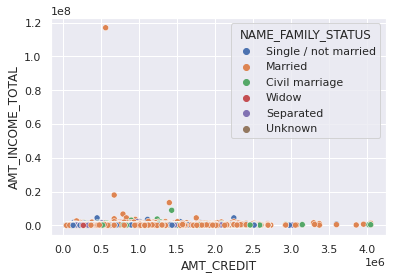

In [201]:
sns.scatterplot(data=application_data1,
                x=application_data1['AMT_CREDIT'],
                y=application_data1['AMT_INCOME_TOTAL'],
                hue='NAME_FAMILY_STATUS'
                )

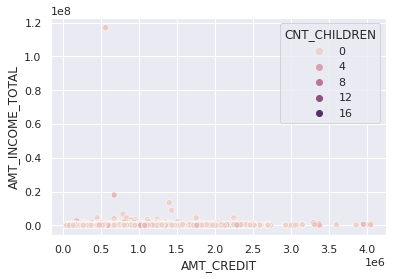

In [202]:
sns.scatterplot(data=application_data1,
                x=application_data1['AMT_CREDIT'],
                y=application_data1['AMT_INCOME_TOTAL'],
                hue='CNT_CHILDREN'
                )